# 🧩 Comparing Two Groups – T-test via Regression (Extended)

In [1]:
# Setup and Imports

import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Imports
from utils.model_utils import (
    run_ttest_model,
    extract_group_means,
    export_model_summary_as_text
)
from utils.diagnostics import plot_residual_histogram
from utils.visual_utils import save_and_show_plot

from pingouin import compute_effsize, ttest
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 📂 Setup Paths
DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/common_ttest_comparison")
EXPORT_TABLES = Path("../exports/tables/common_ttest_comparison")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

In [3]:
# 📥 Load Data and Create Group Column
df = pd.read_csv(DATA_PATH / "ols_data.csv")
df['group'] = ['A' if i < len(df)//2 else 'B' for i in range(len(df))]
df.head()

,X1,X2,y,group
0,5.993428,11.073362,0.847148,A
1,4.723471,11.682354,0.008497,A
2,6.295377,13.249154,2.176524,A
3,8.046060,13.161406,4.926576,A
4,4.531693,5.866992,4.015547,A


In [4]:
# 🧪 T-test using OLS (statsmodels)

model = run_ttest_model(df, formula='y ~ group')
print(model.summary())
export_model_summary_as_text(model, EXPORT_TABLES / "ttest_summary.txt")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1642
Date:                Sat, 26 Jul 2025   Prob (F-statistic):              0.686
Time:                        23:54:19   Log-Likelihood:                -534.18
No. Observations:                 200   AIC:                             1072.
Df Residuals:                     198   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9682      0.351      5.600      0.0

In [5]:
# 📊 Group-wise Means
group_means = extract_group_means(df, group_col='group', target_col='y')
display(group_means)
group_means.to_csv(EXPORT_TABLES / "group_means.csv")

group
A    1.968172
B    2.169591
Name: y, dtype: float64

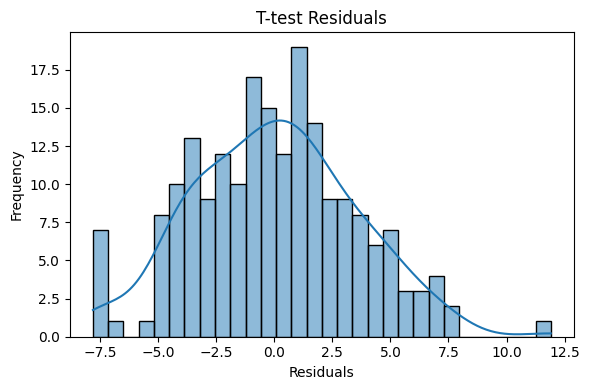

In [6]:
# 📈 Residual Plot

plot_residual_histogram(model, title="T-test Residuals")
save_and_show_plot("residuals_ttest", EXPORT_PLOTS)

In [7]:
# 📏 Effect Size (Cohen's d)

cohens_d = compute_effsize(df[df['group']=='A']['y'], df[df['group']=='B']['y'], eftype='cohen')
print("Cohen's d:", cohens_d)

Cohen's d: -0.05730456178031032


/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T/ipykernel_93420/4075587644.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=df, x='group', y='y', ci=95, capsize=0.2)


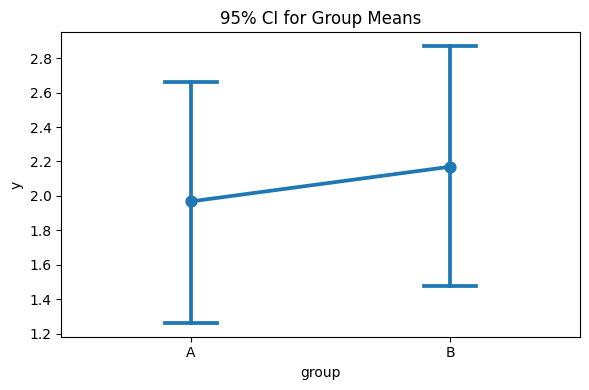

In [8]:
# 📉 Confidence Interval Plot of Group Means

plt.figure(figsize=(6, 4))
sns.pointplot(data=df, x='group', y='y', ci=95, capsize=0.2)
plt.title("95% CI for Group Means")
plt.tight_layout()
save_and_show_plot("group_means_ci", EXPORT_PLOTS)

## ✅ Summary:

- Performed t-test using OLS regression model (`y ~ group`)
- Compared group means and visualized residuals
- Calculated **Cohen’s d** as effect size (via `pingouin`)
- Plotted 95% confidence intervals around group means
- Exported model summary, group means, and all plots